In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import plotly
import plotly.express as px

In [9]:
df = pd.read_csv('data/fraudTrain.csv')

In [11]:
df = df.iloc[: , 1:]
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

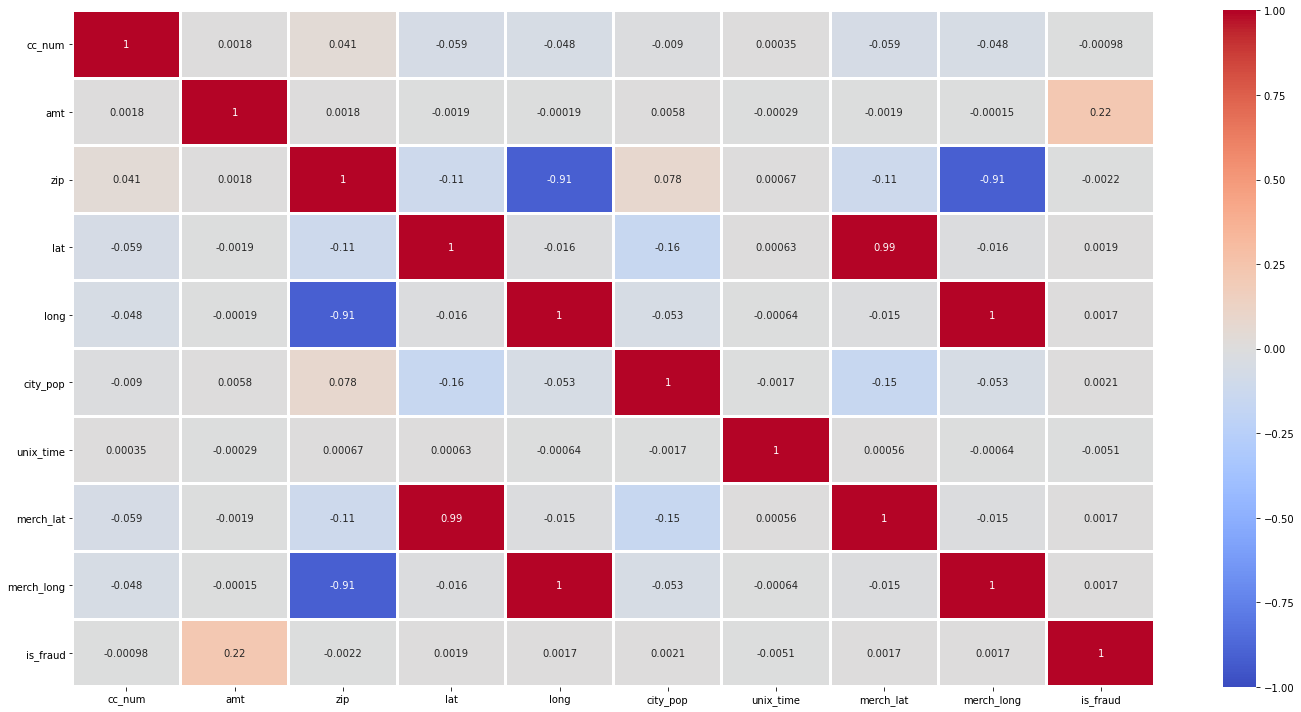

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1,vmax=1,
           annot=True, linewidths=2)
plt.tight_layout()
plt.show()

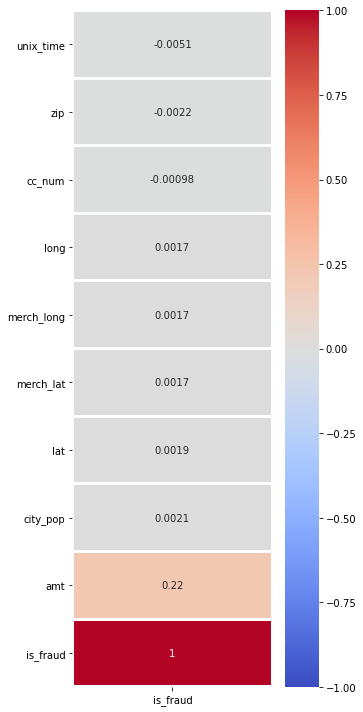

In [18]:
plt.figure(figsize=(5,10))
sns.heatmap(df.corr()[['is_fraud']].sort_values(by=['is_fraud']), cmap='coolwarm', vmin=-1,vmax=1,
           annot=True, linewidths=2)
plt.tight_layout()
plt.show()

In [19]:
#sns.pairplot(df)

In [20]:
#df['merchant'].str.replace('fraud_', 'merchant_').str.replace(' ', '').str.replace(',', '')
#df['category'] = df['category'].str.replace('fraud_', 'merchant_').str.replace(' ', '').str.replace(',', '')
df['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [21]:
df['category'] = df['category'].replace(['grocery_pos'],'grocery')
df['category'] = df['category'].replace(['shopping_pos'],'shopping')
df['category'] = df['category'].replace(['shopping_net'],'shopping')
df['category'] = df['category'].replace(['misc_pos'],'misc')
df['category'] = df['category'].replace(['misc_net'],'misc')
df['category'] = df['category'].replace(['grocery_net'],'grocery')
df['category'].value_counts()

shopping          214215
grocery           169090
misc              142942
gas_transport     131659
home              123115
kids_pets         113035
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
travel             40507
Name: category, dtype: int64

In [22]:
category_ohe = OneHotEncoder()
category = pd.DataFrame(df['category'])
category_encoded = category_ohe.fit_transform(category)
display(category_encoded)

<1296675x11 sparse matrix of type '<class 'numpy.float64'>'
	with 1296675 stored elements in Compressed Sparse Row format>

In [23]:
encoded_df_category = pd.DataFrame(category_encoded.toarray().astype(int), columns=category_ohe.categories_[0], dtype=int)
encoded_df_category = encoded_df_category.drop(encoded_df_category.columns[0], axis=1)
display(encoded_df_category.head(2))

,food_dining,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel
0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0


In [24]:
# Join back to df
df = pd.concat([df, encoded_df_category], axis=1)
df.drop(columns='category', inplace=True)
df.head(2)

,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,...,food_dining,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,0,0,0,0,0,0,1,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,0,0,1,0,0,0,0,0,0,0


In [25]:
df = df.drop(columns=['merchant', 'first', 'last'])

In [26]:
df.head(2)

,trans_date_trans_time,cc_num,amt,gender,street,city,state,zip,lat,long,...,food_dining,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel
0,2019-01-01 00:00:18,2703186189652095,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,...,0,0,0,0,0,0,1,0,0,0
1,2019-01-01 00:00:44,630423337322,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,...,0,0,1,0,0,0,0,0,0,0


In [27]:
# Add new binary column for gender
df["male"] = np.where(df["gender"]=="M", 1, 0)

# Drop the gender column
df.drop(columns="gender", inplace=True)
df.head(2)

,trans_date_trans_time,cc_num,amt,street,city,state,zip,lat,long,city_pop,...,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel,male
0,2019-01-01 00:00:18,2703186189652095,4.97,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,...,0,0,0,0,0,1,0,0,0,0
1,2019-01-01 00:00:44,630423337322,107.23,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,...,0,1,0,0,0,0,0,0,0,0


In [28]:
df['age'] = 2021 - df['dob'].str.split('-', expand=True)[0].astype('int')

In [29]:
df.drop(columns="dob", inplace=True)

In [30]:
df.head(2)

,trans_date_trans_time,cc_num,amt,street,city,state,zip,lat,long,city_pop,...,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel,male,age
0,2019-01-01 00:00:18,2703186189652095,4.97,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,...,0,0,0,0,1,0,0,0,0,33
1,2019-01-01 00:00:44,630423337322,107.23,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,...,1,0,0,0,0,0,0,0,0,43


In [31]:
df['transaction_year'] = df['trans_date_trans_time'].str.split('-', expand=True)[0]
df['transaction_month'] = df['trans_date_trans_time'].str.split('-', expand=True)[1]
df['transaction_day'] = df['trans_date_trans_time'].str.split('-', expand=True)[2]

In [32]:
df['transaction_day'] = df['transaction_day'].str.split(' ', expand=True)[0]

In [33]:
df['transaction_time_hour'] = df['trans_date_trans_time'].str.split(' ', expand=True)[1]
df['transaction_time_hour'] = df['transaction_time_hour'].str.split(':', expand=True)[0]

In [34]:
df.drop(columns="trans_date_trans_time", inplace=True)
df.tail(2)

,cc_num,amt,street,city,state,zip,lat,long,city_pop,job,...,misc,personal_care,shopping,travel,male,age,transaction_year,transaction_month,transaction_day,transaction_time_hour
1296673,2720012583106919,74.9,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,...,0,0,0,0,1,41,2020,06,21,12
1296674,4292902571056973207,4.3,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",...,0,0,0,0,1,26,2020,06,21,12


In [35]:
df.drop(columns=["cc_num", 'cc_num', 'unix_time', 'job'], inplace=True)

In [36]:
df.tail(2)

,amt,street,city,state,zip,lat,long,city_pop,trans_num,merch_lat,...,misc,personal_care,shopping,travel,male,age,transaction_year,transaction_month,transaction_day,transaction_time_hour
1296673,74.9,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,d667cdcbadaaed3da3f4020e83591c83,42.788940,...,0,0,0,0,1,41,2020,06,21,12
1296674,4.3,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,8f7c8e4ab7f25875d753b422917c98c9,46.565983,...,0,0,0,0,1,26,2020,06,21,12


In [37]:
state_ohe = OneHotEncoder()
state = pd.DataFrame(df['state'])
state_encoded = state_ohe.fit_transform(state)
display(state_encoded)

<1296675x51 sparse matrix of type '<class 'numpy.float64'>'
	with 1296675 stored elements in Compressed Sparse Row format>

In [38]:
encoded_df_state = pd.DataFrame(state_encoded.toarray().astype(int), columns=state_ohe.categories_[0], dtype=int)
encoded_df_state = encoded_df_state.drop(encoded_df_state.columns[0], axis=1)
display(encoded_df_state.head(2))

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
# Join back to df
df = pd.concat([df, encoded_df_state], axis=1)
df.drop(columns='state', inplace=True)
df.head(2)

,amt,street,city,zip,lat,long,city_pop,trans_num,merch_lat,merch_long,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,561 Perry Cove,Moravian Falls,28654,36.0788,-81.1781,3495,0b242abb623afc578575680df30655b9,36.011293,-82.048315,...,0,0,0,0,0,0,0,0,0,0
1,107.23,43039 Riley Greens Suite 393,Orient,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,49.159047,-118.186462,...,0,0,0,0,0,0,1,0,0,0


In [40]:
df.drop(columns=['trans_num', 'street', 'city'], inplace=True)
df.head(2)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,food_dining,gas_transport,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
x = df.drop(columns='is_fraud')
y = df['is_fraud']

In [44]:
x.shape

(1296675, 73)

In [45]:
# split data into new train and validation
from sklearn.model_selection import train_test_split
X_train_new, X_validation, y_train_new, y_validation = train_test_split(x,
                                                                        y,
                                                                        test_size = 0.2,
                                                                        random_state=17)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
norm_scaler = MinMaxScaler()
norm_scaler = norm_scaler.fit(X_train_new)
X_train_norm_scaled = norm_scaler.transform(X_train_new)
X_validation_norm_scaled = norm_scaler.transform(X_validation)

display(X_train_norm_scaled.shape)
display(X_validation_norm_scaled.shape)

(1037340, 73)

(259335, 73)

In [48]:
# 1. Instantiate the logistic regression model on min-max scaled data
logistic_regression_model_min_max = LogisticRegression(solver='lbfgs')

# 2. Fit the model to train set
logistic_regression_model_min_max.fit(X_train_norm_scaled, y_train_new)

# Accuracy
print(f"Train accuracy of min/max scaled data: {logistic_regression_model_min_max.score(X_train_norm_scaled, y_train_new)}")
print(f"Validation accuracy of min/max scaled data: {logistic_regression_model_min_max.score(X_validation_norm_scaled, y_validation)}")

Train accuracy of min/max scaled data: 0.9940578788054061
Validation accuracy of min/max scaled data: 0.9940887269362022


In [49]:
# Instatiate our model
nbmodel = BernoulliNB()
# Fit our model
nbmodel.fit(X_train_norm_scaled,y_train_new)

BernoulliNB()